::: {#fig-cefereso}

![](images/cefereso.png){width=700}

Cefereso No. 12 Vehicule Gate

:::

# What is OADPRS?

The Decentralized Administrative Body for Prevention and Social Readaptation (OADPRS) is a key institution in Mexico's public security system.

It is a decentralized administrative body, meaning it has technical and operational autonomy, but reports hierarchically to the Ministry of Security and Citizen Protection.
Its main objective is to administer the Federal Penitentiary System, implementing policies for crime prevention and the social rehabilitation of inmates.

## Main Functions

- **Administration of the Federal Penitentiary System**

    Responsible for the management and operation of federal social rehabilitation centers (CEFERESOS) throughout the country.

- **Implementation of social reintegration policies**

    Develops and implements programs and strategies to facilitate the reintegration of inmates into society through educational, employment, sports, and health activities.

- **Guarantee of Human Rights**

    Ensures respect for the human rights of persons deprived of their liberty, ensuring decent living conditions in prisons.

- **Crime Prevention**

    Contributes to crime prevention through the implementation of effective social reintegration programs and collaboration with other public security institutions.

## Importance

The OADPRS plays a fundamental role in the criminal justice system, as social rehabilitation is a key element in reducing recidivism and strengthening public security.
Its work is essential to ensuring that persons deprived of their liberty have the opportunity to reintegrate into society in a productive and law-abiding manner.
The work of the OADPRS is monitored by the National Human Rights Commission to ensure that inmates' rights are respected.

## Challenges

The OADPRS faces significant challenges, such as overcrowding in some prisons, the need to improve inmates' living conditions, and the fight against corruption.
In addition, the CNDH has issued various recommendations stemming from the lack of timely medical care within penitentiary centers.

In short, the OADPRS is a crucial institution for public safety and criminal justice in Mexico, responsible for administering the federal penitentiary system and promoting the social reintegration of inmates.

# Environment settings

In [1]:
# import libraries
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# read data from url
df = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Prisiones_de_M%C3%A9xico')[0]

# Data manipulation

In [3]:
# headers
columns = ['prison','location','construction','qualification','surface_m2','capacity','inmates​',
           'cost_$MX','coordinates']

# rename dataframe headers
df.columns = columns

In [4]:
# drop subtitles
ceferesos = df.drop([0,2,19,], axis=0).reset_index(drop=True)

# select relevant columns
ceferesos = ceferesos.iloc[:18]

In [5]:
# clean coordinates to get latitude and longitude
ceferesos['coordinates'] = ceferesos['coordinates'].str.split()
# latitud
latitude = ceferesos['coordinates'].str[-2]
# longitude
longitude = ceferesos['coordinates'].str[-1]
# add latitude
ceferesos['latitude'] = latitude
# drop '\ufeff' from latitude
ceferesos['latitude'] = ceferesos['latitude'].str.replace('\ufeff','')
# drop ',' from latitude
ceferesos['latitude'] = ceferesos['latitude'].str.replace(',','')
# add longitude
ceferesos['longitude'] = longitude

In [6]:
# list columns
list(enumerate(ceferesos.columns))

[(0, 'prison'),
 (1, 'location'),
 (2, 'construction'),
 (3, 'qualification'),
 (4, 'surface_m2'),
 (5, 'capacity'),
 (6, 'inmates\u200b'),
 (7, 'cost_$MX'),
 (8, 'coordinates'),
 (9, 'latitude'),
 (10, 'longitude')]

In [7]:
# select relevant columns
ceferesos = ceferesos.iloc[:, [0,1,5,9,10,]]

In [8]:
# convert column to numeric
ceferesos['capacity'] = pd.to_numeric(ceferesos.loc[:, 'capacity'])

# Capacity of Federal Prisons in Mexico - 2016

The following chart shows the official capacity for each federal prison in Mexico. However, these facilities are often overcrowded, exceeding their intended capacity.

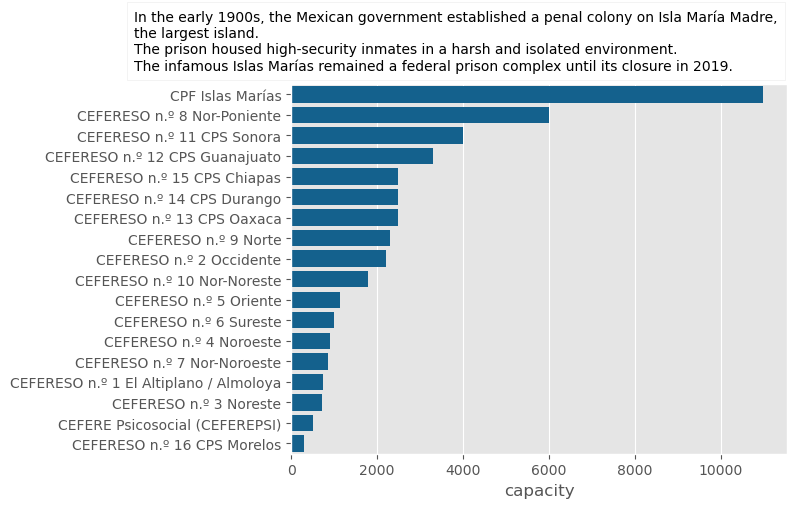

In [9]:
sns.barplot(y='prison',
            x='capacity',
            data=ceferesos.sort_values(by='capacity', ascending=False,),
            color='#0066a1')

plt.figtext(-0.12, 0.91,
'''In the early 1900s, the Mexican government established a penal colony on Isla María Madre,
the largest island.
The prison housed high-security inmates in a harsh and isolated environment.
The infamous Islas Marías remained a federal prison complex until its closure in 2019.''',
            ha="left",
            fontsize=10,
            bbox={"facecolor": "white", "pad": 5})

plt.ylabel('')
plt.show()

In [10]:
# formatting numbers
ceferesos['capacity'] = ceferesos.loc[:, 'capacity'].map('{:,.0f}'.format)

In [11]:
# convert coordinates to numeric
ceferesos[['latitude','longitude']] = ceferesos[['latitude','longitude']].apply(pd.to_numeric)

In [12]:
ceferesos

,prison,location,capacity,latitude,longitude
0,CPF Islas Marías,"Puerto Balleto, Nayarit","11,000",21.633202,-106.539209
1,CEFERESO n.º 1 El Altiplano / Almoloya,"Santa Juana Centro, Estado de México",750,19.420583,-99.748747
2,CEFERESO n.º 2 Occidente,"Puente Grande, Jalisco","2,200",20.555467,-103.193661
3,CEFERESO n.º 3 Noreste,"Matamoros, Tamaulipas",725,25.847306,-97.634417
4,CEFERESO n.º 4 Noroeste,"El Rincón, Nayarit",909,21.602131,-104.933199
5,CEFERESO n.º 5 Oriente,"Villa Aldama, Veracruz","1,150",19.624694,-97.219000
6,CEFERESO n.º 6 Sureste,"Villa Estación Chontalpa, Tabasco","1,000",17.659222,-93.495417
7,CEFERESO n.º 7 Nor-Noroeste,"Guadalupe Victoria, Durango",850,24.431806,-104.168167
8,CEFERESO n.º 8 Nor-Poniente,"Ejido La Chuparrosa, Sinaloa","5,999",25.525250,-108.532250
9,CEFERESO n.º 9 Norte,"Ciudad Juárez, Chihuahua","2,303",31.494083,-106.457556


# Geographical Distribution of Mexico's Federal Penal System

The following map shows the location of each federal prison in Mexico.

In [13]:
import folium
from folium.plugins import Fullscreen

map = folium.Map(
    location=[23.65, -103.10],
    zoom_start=5,
    control_scale=False,   
)

# Layers
Ceferesos = folium.FeatureGroup(name= '<u><b>Ceferesos</b></u>',show= True)
map.add_child(Ceferesos)
#draw marker with symbol you want at base
my_symbol_css_class3= """ <style>
.fa-mysymbol3:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: white;
    background-color:'';
    border-radius: 10px; 
    white-space: pre;
    content: 'P';
    }
</style>    
        """
# the below is just add above  CSS class to folium root map      
map.get_root().html.add_child(folium.Element(my_symbol_css_class3))
# then we just create marker and specific your css class in icon like below
for i in ceferesos.index:
   html=f"""
        <p style="font-size: 14px;">{ceferesos.iloc[i]['prison']}</font></p>
        <p style="font-size: 14px;">Location: {ceferesos.iloc[i]['location']}</font></p>
        <p style="font-size: 14px;">Capacity (inmates): {ceferesos.iloc[i]['capacity']}</font></p>
        """
   iframe = folium.IFrame(html=html, width=200, height=130)
   popup = folium.Popup(iframe, max_width=250)
   
   folium.Marker(
        location = [ceferesos.iloc[i]['latitude'], ceferesos.iloc[i]['longitude']],
        icon = folium.Icon(color='darkblue', prefix='fa', icon='fa-mysymbol3'),
        popup = popup,
        tooltip = ceferesos.iloc[i]['prison']
    ).add_to(Ceferesos)
folium.plugins.Fullscreen().add_to(map)

In [14]:
map

::: {.callout-note}
## Info
You can hover the mouse over the green icons to get additional information and interact with the map by zooming in or out to see the exact location.
:::

# Conclusions

In this article, we briefly collected open data from federal prisons in Mexico, cleaned the dataset and got coordinates to create an interactive map by using Folium and Python.

We showed a chart with different capacities of each federal prison and presented the geographical distribution of federal prisons in Mexico.

# References

- Comisión Nacional de Seguridad, Secretaría de Gobernación (2016). Cuaderno mensual de Información Estadística Penitenciaria Nacional, Junio 2016.

- Wikipedia (2016). [Mexico Prisons](https://es.wikipedia.org/wiki/Anexo:Prisiones_de_M%C3%A9xico). Retrieved from website.

- Corbin A (2024). [The Institutional Deficiencies Which Cause Mexico’s 95% Impunity Rate](https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1870-05782023000100081). Retrieved from Scielo Website.

# Contact

**Jesus L. Monroy**
<br>
*Economist & Data Scientist*

[Medium](https://medium.com/@jesuslm) | [Linkedin](https://www.linkedin.com/in/j3sus-lm) | [Twitter](https://x.com/j3suslm)